In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='CIFAR10/train', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='CIFAR10/test', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4,   shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


plane  deer horse   dog


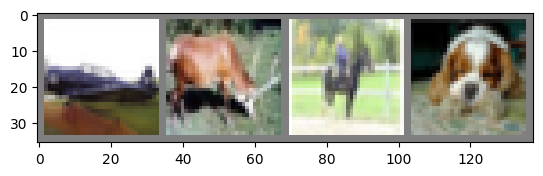

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 显示图片的函数


def imshow(img):
    img = img / 2 + 0.5     #  [-1,1] -> [0,1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # (channel, width, height) -> (width, height, channel)


# 随机选择一些图片
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 显示图片
imshow(torchvision.utils.make_grid(images))
# 打印label
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
	def __init__(self):
		super(Net, self).__init__()
		self.conv1 = nn.Conv2d(3, 6, 5)
		self.pool = nn.MaxPool2d(2, 2)
		self.conv2 = nn.Conv2d(6, 16, 5)
		self.fc1 = nn.Linear(16 * 5 * 5, 120)
		self.fc2 = nn.Linear(120, 84)
		self.fc3 = nn.Linear(84, 10)
	
	def forward(self, x):
		x = self.pool(F.relu(self.conv1(x)))
		x = self.pool(F.relu(self.conv2(x)))
		x = x.view(-1, 16 * 5 * 5)
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = self.fc3(x)
		return x

net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):  # 这里只迭代2个epoch，实际应该进行更多次训练 

	running_loss = 0.0
	for i, data in enumerate(trainloader, 0):
		# 得到输入
		inputs, labels = data
		
		# 梯度清零 
		optimizer.zero_grad()
		
		# forward + backward + optimize
		outputs = net(inputs)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()
		
		# 定义统计信息
		running_loss += loss.item()
		if i % 2000 == 1999:
			print('[%d, %5d] loss: %.3f' %
				(epoch + 1, i + 1, running_loss/2000))
			running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.208
[1,  4000] loss: 1.208
[1,  6000] loss: 1.201
[1,  8000] loss: 1.172
[1, 10000] loss: 1.183
[1, 12000] loss: 1.160
[2,  2000] loss: 1.092
[2,  4000] loss: 1.094
[2,  6000] loss: 1.087
[2,  8000] loss: 1.087
[2, 10000] loss: 1.081
[2, 12000] loss: 1.087
Finished Training


GroundTruth:    cat  ship  ship plane


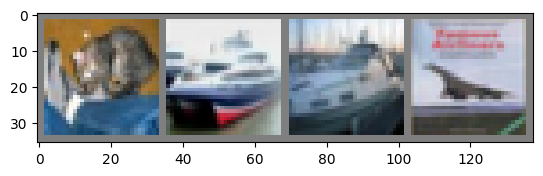

In [7]:
dataiter = iter(testloader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
outputs = net(images)
print(outputs.size())

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
		for j in range(4)))


torch.Size([4, 10])
Predicted:    cat  ship  ship plane


In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
	100 * correct / total))

# Accuracy of the network on the 10000 test images: 55 %

Accuracy of the network on the 10000 test images: 54 %
